<a href="https://colab.research.google.com/github/totiela/Movie-Search-Chatbot/blob/main/notebooks/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек и загрузка данных

In [37]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

# Отключение всех предупреждений
warnings.filterwarnings("ignore")

# Настройка стиля графиков и цветовой палитры
sns.set(style="whitegrid")

In [38]:
# Клонируем репозитоиий
!git clone https://github.com/totiela/vk-ml-time-series-test-task.git
%cd vk-ml-time-series-test-task

Cloning into 'vk-ml-time-series-test-task'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 15.95 MiB | 6.05 MiB/s, done.
/content/vk-ml-time-series-test-task/vk-ml-time-series-test-task


In [39]:
# Загружаем тренировочный и тестовый датафреймы
train_path = "data/train.parquet"
test_path = "data/test.parquet"

df = pd.read_parquet(train_path)
test_df = pd.read_parquet(test_path)

# Первичный осмотр данных

In [15]:
# Пример первых строк данных
print("Пример первых строк данных для train_df:")
print(df.head(), '\n')
print("Пример первых строк данных для test_df:")
print(test_df.head(), '\n')

Пример первых строк данных для train_df:
      id                                              dates  \
0  19114  [2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...   
1  22769  [2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...   
2  76935  [2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...   
3  66297  [2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...   
4   2191  [2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...   

                                              values  label  
0  [-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....    0.0  
1  [-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...    1.0  
2  [0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...    0.0  
3  [-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...    0.0  
4  [1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...    0.0   

Пример первых строк данных для test_df:
      id                                              dates  \
0   6125  [2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...   
1  26781  [2016-01-01, 2016-02-01, 2016-

In [17]:
# Основная информация о данных
print("Основная информация о train_df:")
print(df.info(), '\n')
print("Основная информация о test_df:")
print(test_df.info(), '\n')

Основная информация о train_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      80000 non-null  int64  
 1   dates   80000 non-null  object 
 2   values  80000 non-null  object 
 3   label   80000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB
None 

Основная информация о test_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20000 non-null  int64 
 1   dates   20000 non-null  object
 2   values  20000 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.9+ KB
None 



In [18]:
# Описание данных
print("Описание данных для train_df:")
print(df.describe(), '\n')
print("Описание данных для test_df:")
print(test_df.describe(), '\n')

Описание данных для train_df:
                 id         label
count  80000.000000  80000.000000
mean   50107.893162      0.277250
std    28857.649778      0.447644
min        0.000000      0.000000
25%    25122.500000      0.000000
50%    50146.500000      0.000000
75%    75064.250000      1.000000
max    99999.000000      1.000000 

Описание данных для test_df:
                 id
count  20000.000000
mean   49565.927350
std    28904.312706
min        2.000000
25%    24497.250000
50%    49399.000000
75%    74769.250000
max    99985.000000 



# Исследование длины временных рядов (сравнение распределения тренеровочных данных с тестовыми)

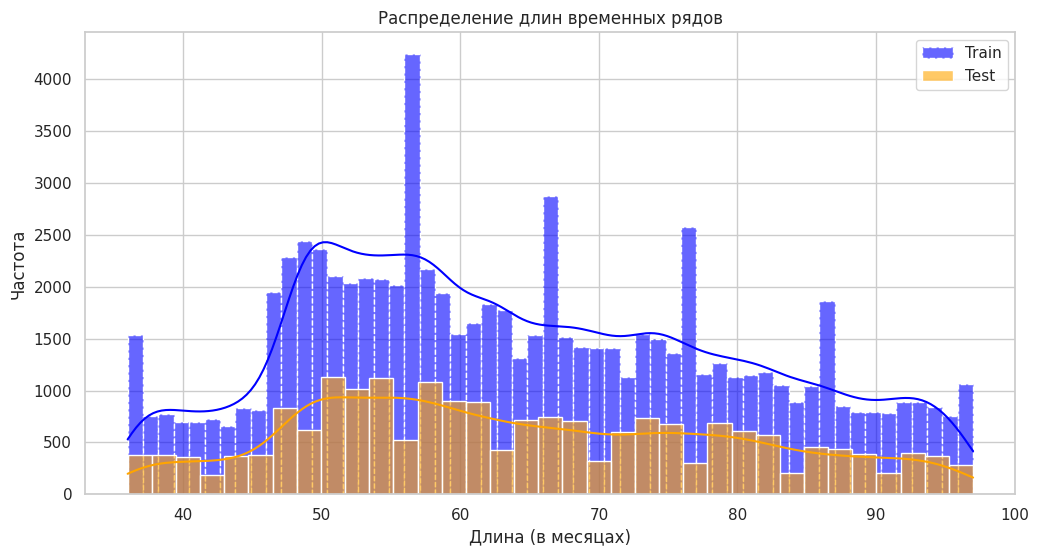

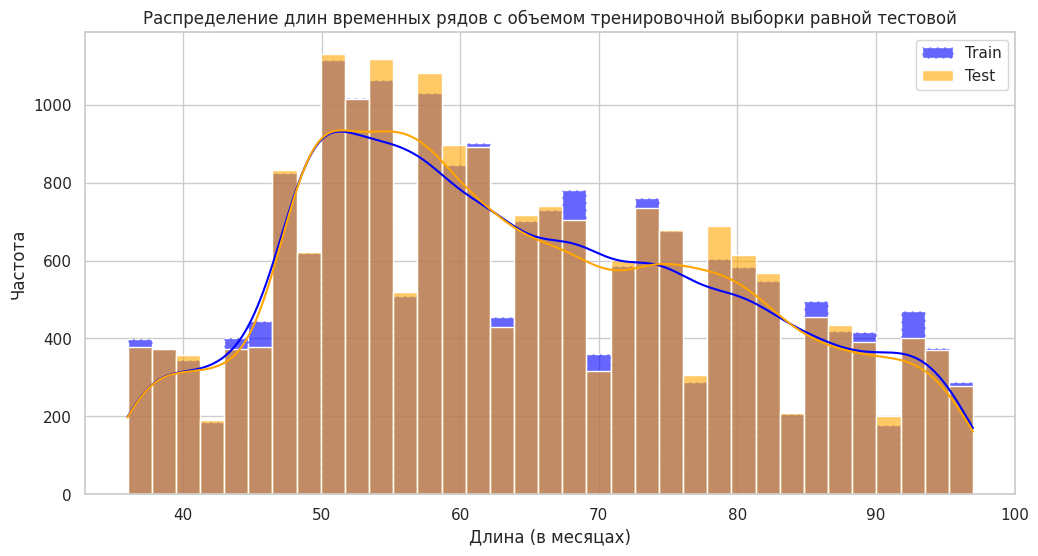

In [19]:
# Графики распределения длин временных рядов тренировочной и тестовой выборок

# Преобразование данных для удобства анализа
df['length'] = df['values'].apply(len)
test_df['length'] = test_df['values'].apply(len)

# Распределение длин временных рядов
plt.figure(figsize=(12, 6))
sns.histplot(df['length'], label='Train', color='blue', kde=True, alpha=0.6, linestyle='--')
sns.histplot(test_df['length'], label='Test', color='orange', kde=True, alpha=0.6)
plt.title('Распределение длин временных рядов')
plt.xlabel('Длина (в месяцах)')
plt.ylabel('Частота')
plt.legend()
plt.show()

# Распределение длин временных рядов со случайным отбором тренировочных данных равным тестовым
plt.figure(figsize=(12, 6))
sns.histplot(df['length'].sample(20000, random_state=42), label='Train', color='blue', kde=True, alpha=0.6, linestyle='--')
sns.histplot(test_df['length'], label='Test', color='orange', kde=True, alpha=0.6)
plt.title('Распределение длин временных рядов с объемом тренировочной выборки равной тестовой')
plt.xlabel('Длина (в месяцах)')
plt.ylabel('Частота')
plt.legend()
plt.show()

Вывод: распределение длин временных рядов в обучающей и тестовой выборках схожи.

### Распределение значений временных рядов (сравнение распределения тренеровочных данных с тестовыми)


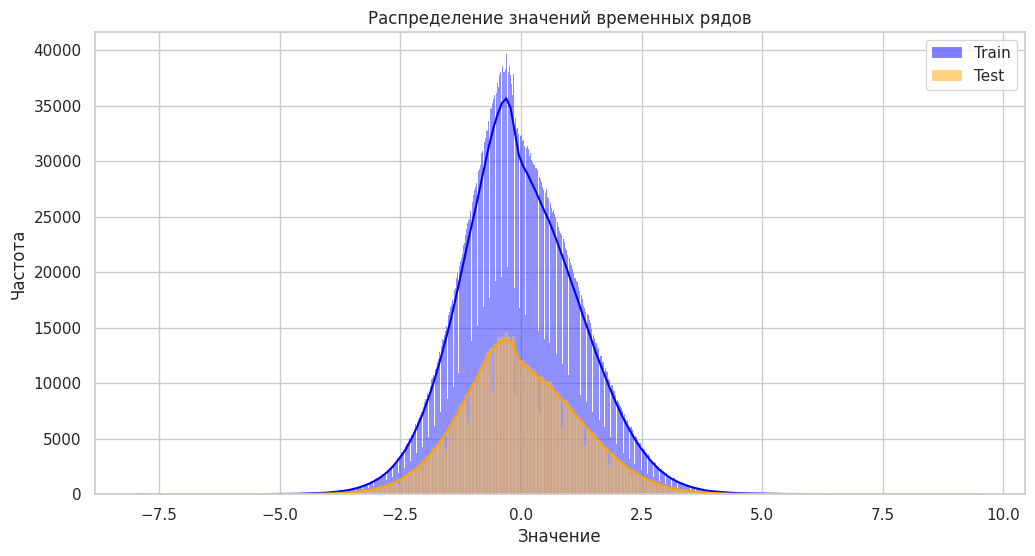

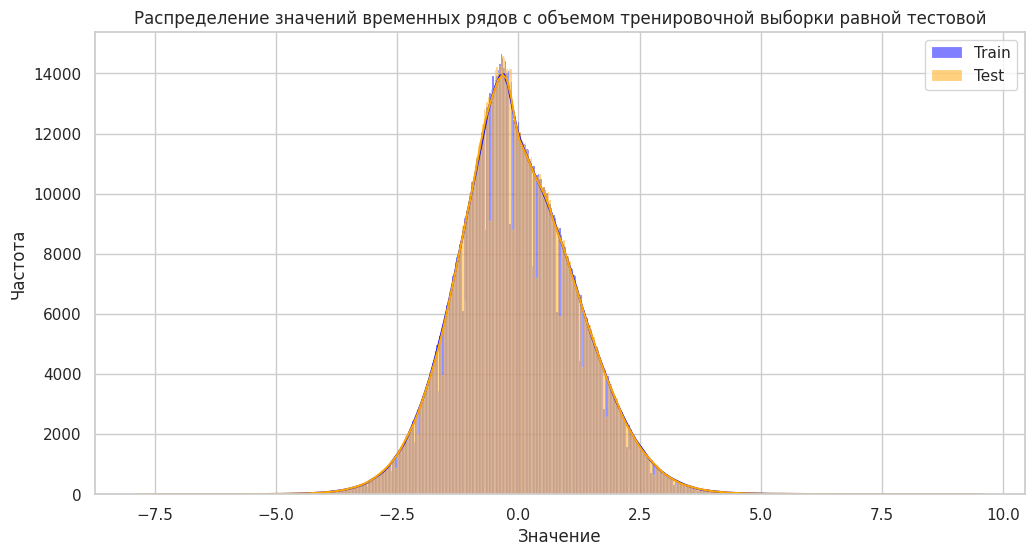

In [20]:
# Графики распределения значений временных рядов тренировочной и тестовой выборок

# Статистическое описание значений временных рядов
train_values = np.concatenate(df['values'].values)
test_values = np.concatenate(test_df['values'].values)

plt.figure(figsize=(12, 6))
sns.histplot(train_values, label='Train', color='blue', kde=True)
sns.histplot(test_values, label='Test', color='orange', kde=True)
plt.title('Распределение значений временных рядов')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.show()

# Статистическое описание значений временных рядов со случайным отбором тренировочных данных равным тестовым
train_values_sample = np.concatenate(df.sample(20000, random_state=42)['values'].values)

plt.figure(figsize=(12, 6))
sns.histplot(train_values_sample, label='Train', color='blue', kde=True)
sns.histplot(test_values, label='Test', color='orange', kde=True)
plt.title('Распределение значений временных рядов с объемом тренировочной выборки равной тестовой')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()
plt.show()

Вывод: распределение значений временных рядов в обучающей и тестовой выборках схожи, видимого смещения нет.

# Сравнение временных рядов по целевым меткам

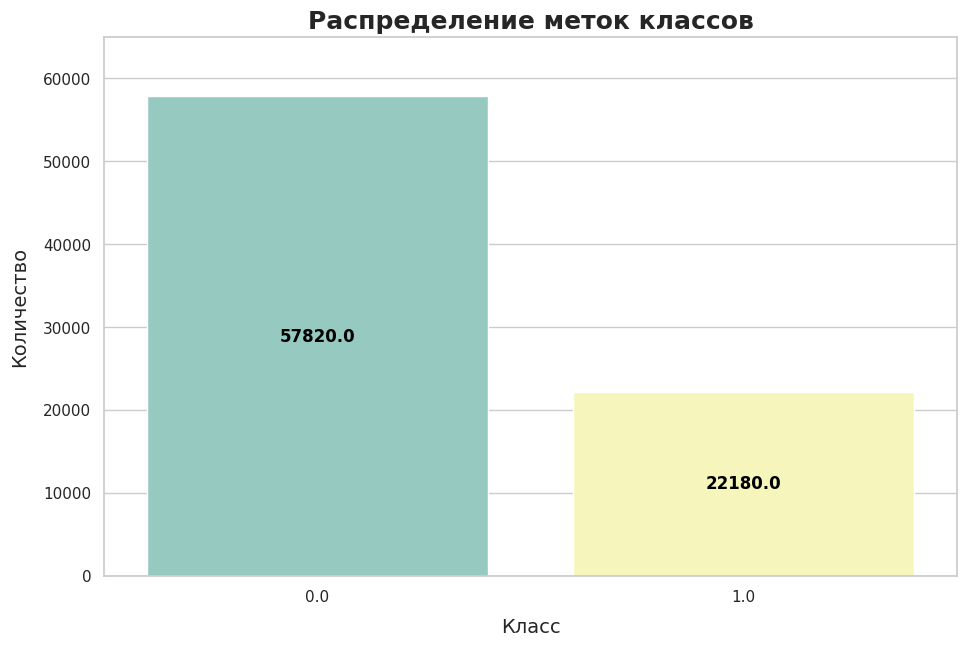

In [23]:
# График распределения классов

plt.figure(figsize=(11, 7))
ax = sns.countplot(data=df, x='label', palette="Set3")

# Добавление аннотаций внутри столбцов
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),  # Положение внутри столбца
                ha='center', va='center',
                fontsize=12, color='black', fontweight='bold')

# Оформление заголовков и меток осей
plt.title("Распределение меток классов", fontsize=18, fontweight='bold')
plt.xlabel("Класс", fontsize=14, labelpad=10)
plt.ylabel("Количество", fontsize=14, labelpad=10)
plt.ylim([0, 65000]) # Устанавливаем ограничение по оси y

plt.show()

Вывод: распределение классов неравномерное, присутствует значимый перевес меток класса '0'.

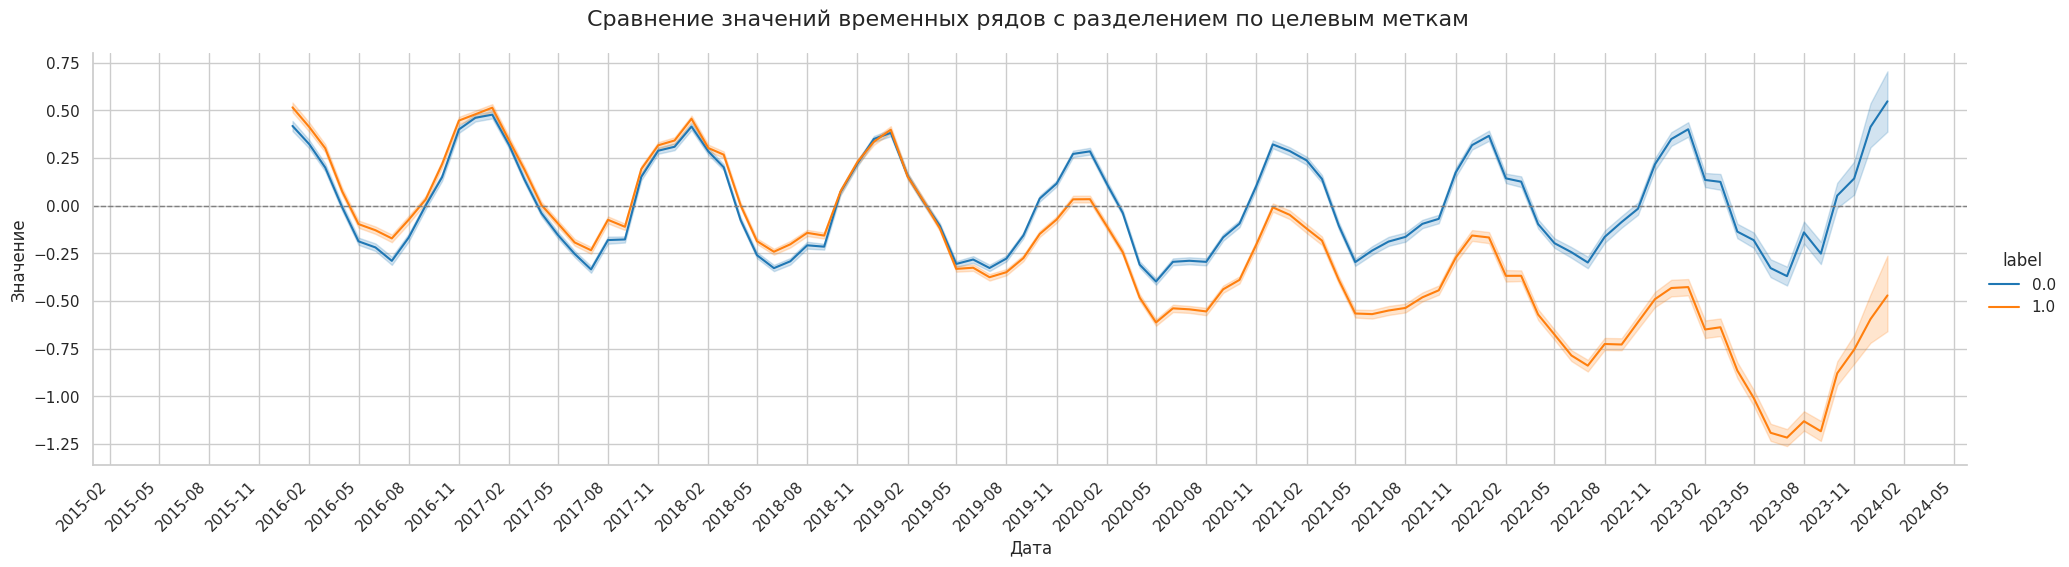

In [24]:
# График значений временных рядов со временем в зависимости от метки класса

# Отбираем по 20000 рядов для каждого класса label
selected_rows = df.groupby('label').apply(lambda x: x.sample(20000, random_state=42)).reset_index(drop=True)

# Преобразуем данные для построения (развернем даты и значения)
selected_rows = selected_rows.explode(['dates', 'values']).reset_index(drop=True)

# Переименуем колонки для соответствия формату
plot_data = selected_rows.rename(columns={'dates': 'date', 'values': 'value'})

# Построение графика
g = sns.relplot(
    data=plot_data,
    x="date",
    y="value",
    hue="label",
    kind="line",
    aspect=4,
    palette="tab10",
)

# Настройки для улучшения внешнего вида
g.set_xticklabels(rotation=45, horizontalalignment="right")
g.fig.suptitle("Сравнение значений временных рядов с разделением по целевым меткам", y=1.05, fontsize=16)
g.set_axis_labels("Дата", "Значение")

# Устанавливаем шаг отметок x каждые 3 месяца
g.ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
g.ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Линия через ноль
plt.show()

Вывод: значения в период до середины 2019 года сложно различимы, однако дальше тенденция видимого различия растет.

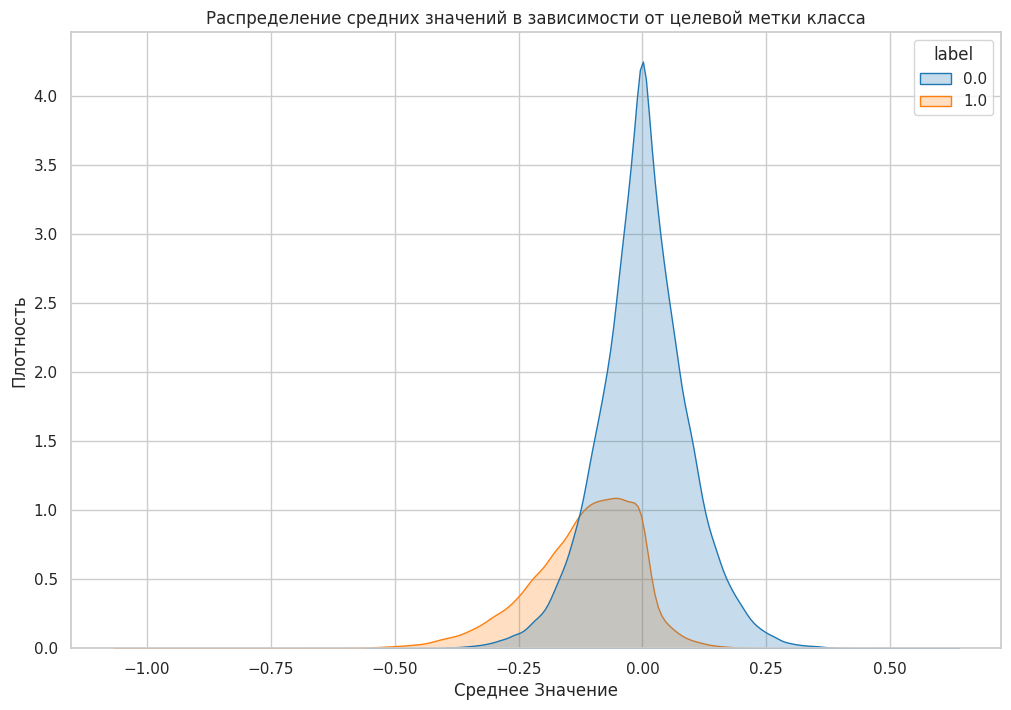

In [25]:
# График распределения средних значений в зависимости от метки класса

# Вычисляем средние значения для каждого временного ряда
df['mean_value'] = df['values'].apply(lambda x: sum(x) / len(x))

# Построение графика распределения средних значений по классам
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='mean_value', hue='label', fill=True, palette="tab10")
plt.title("Распределение средних значений в зависимости от целевой метки класса")
plt.xlabel("Среднее Значение")
plt.ylabel("Плотность")
plt.show()

Вывод: среднее значение является сильным признаком, т.к есть визульно сильное смещение относительно меток класса

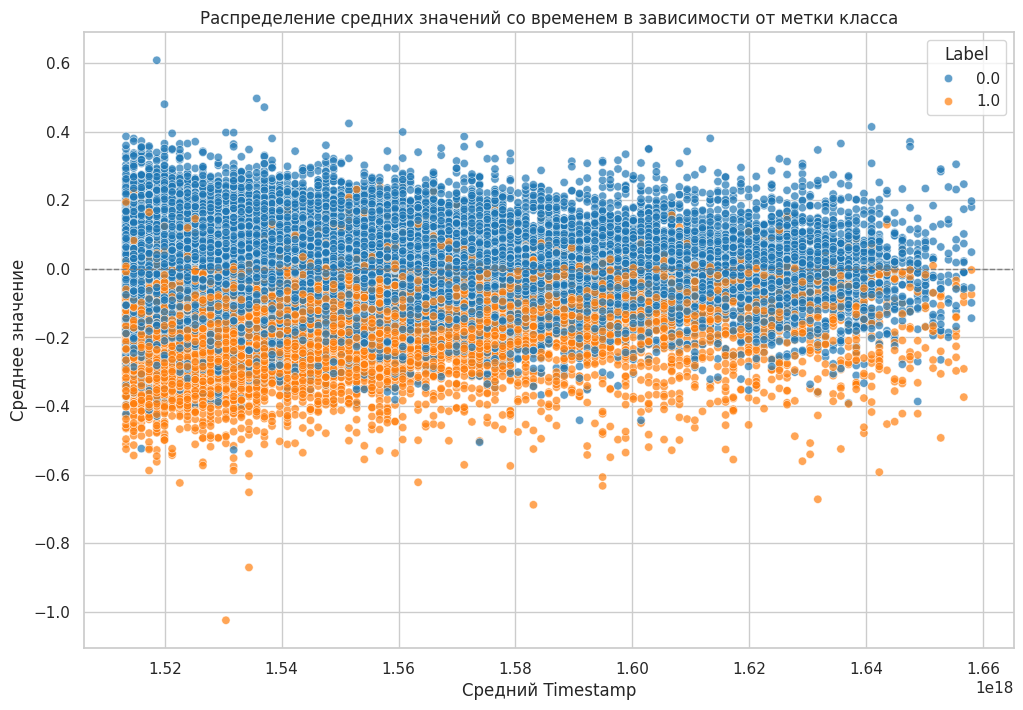

In [26]:
# График распределения средних значений со временем в зависимости от метки класса

# Вычисляем средние значения времени для каждого временного ряда
df['mean_timestamp'] = df['dates'].apply(lambda x: np.mean(pd.to_datetime(x).astype(int)))

# Построение графика распределения средних значений по классам и среднему значению времени
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='mean_timestamp', y='mean_value', hue='label', palette="tab10", alpha=0.7)
plt.title("Распределение средних значений со временем в зависимости от метки класса")
plt.xlabel("Средний Timestamp")
plt.ylabel("Среднее значение")
plt.legend(title="Label")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Линия через ноль для визуальной ориентации
plt.show()

Еще один график показывает нам, что визуально можно различить 2 класса по средним значениям

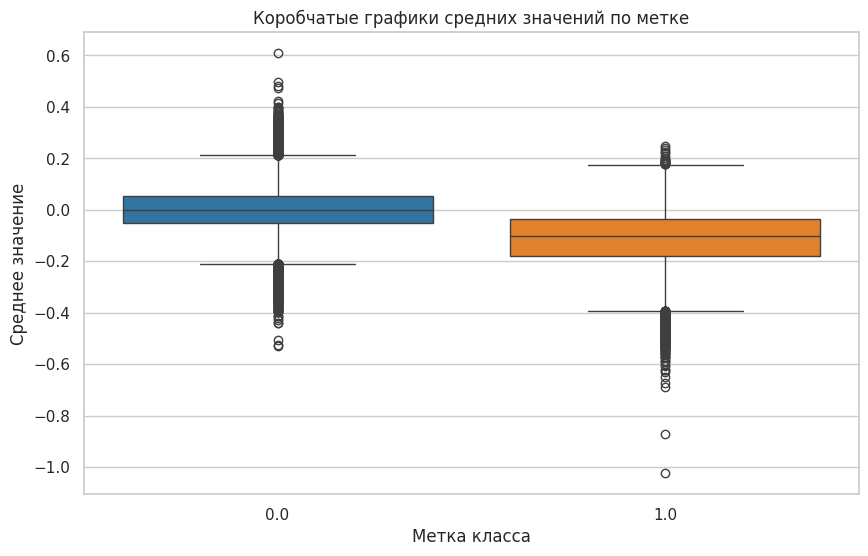

In [28]:
# Boxplot средних значений по метке

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='mean_value', palette="tab10")
plt.title("Коробчатые графики средних значений по метке")
plt.xlabel("Метка класса")
plt.ylabel("Среднее значение")
plt.show()

Boxplot также сигнализирует о смещении

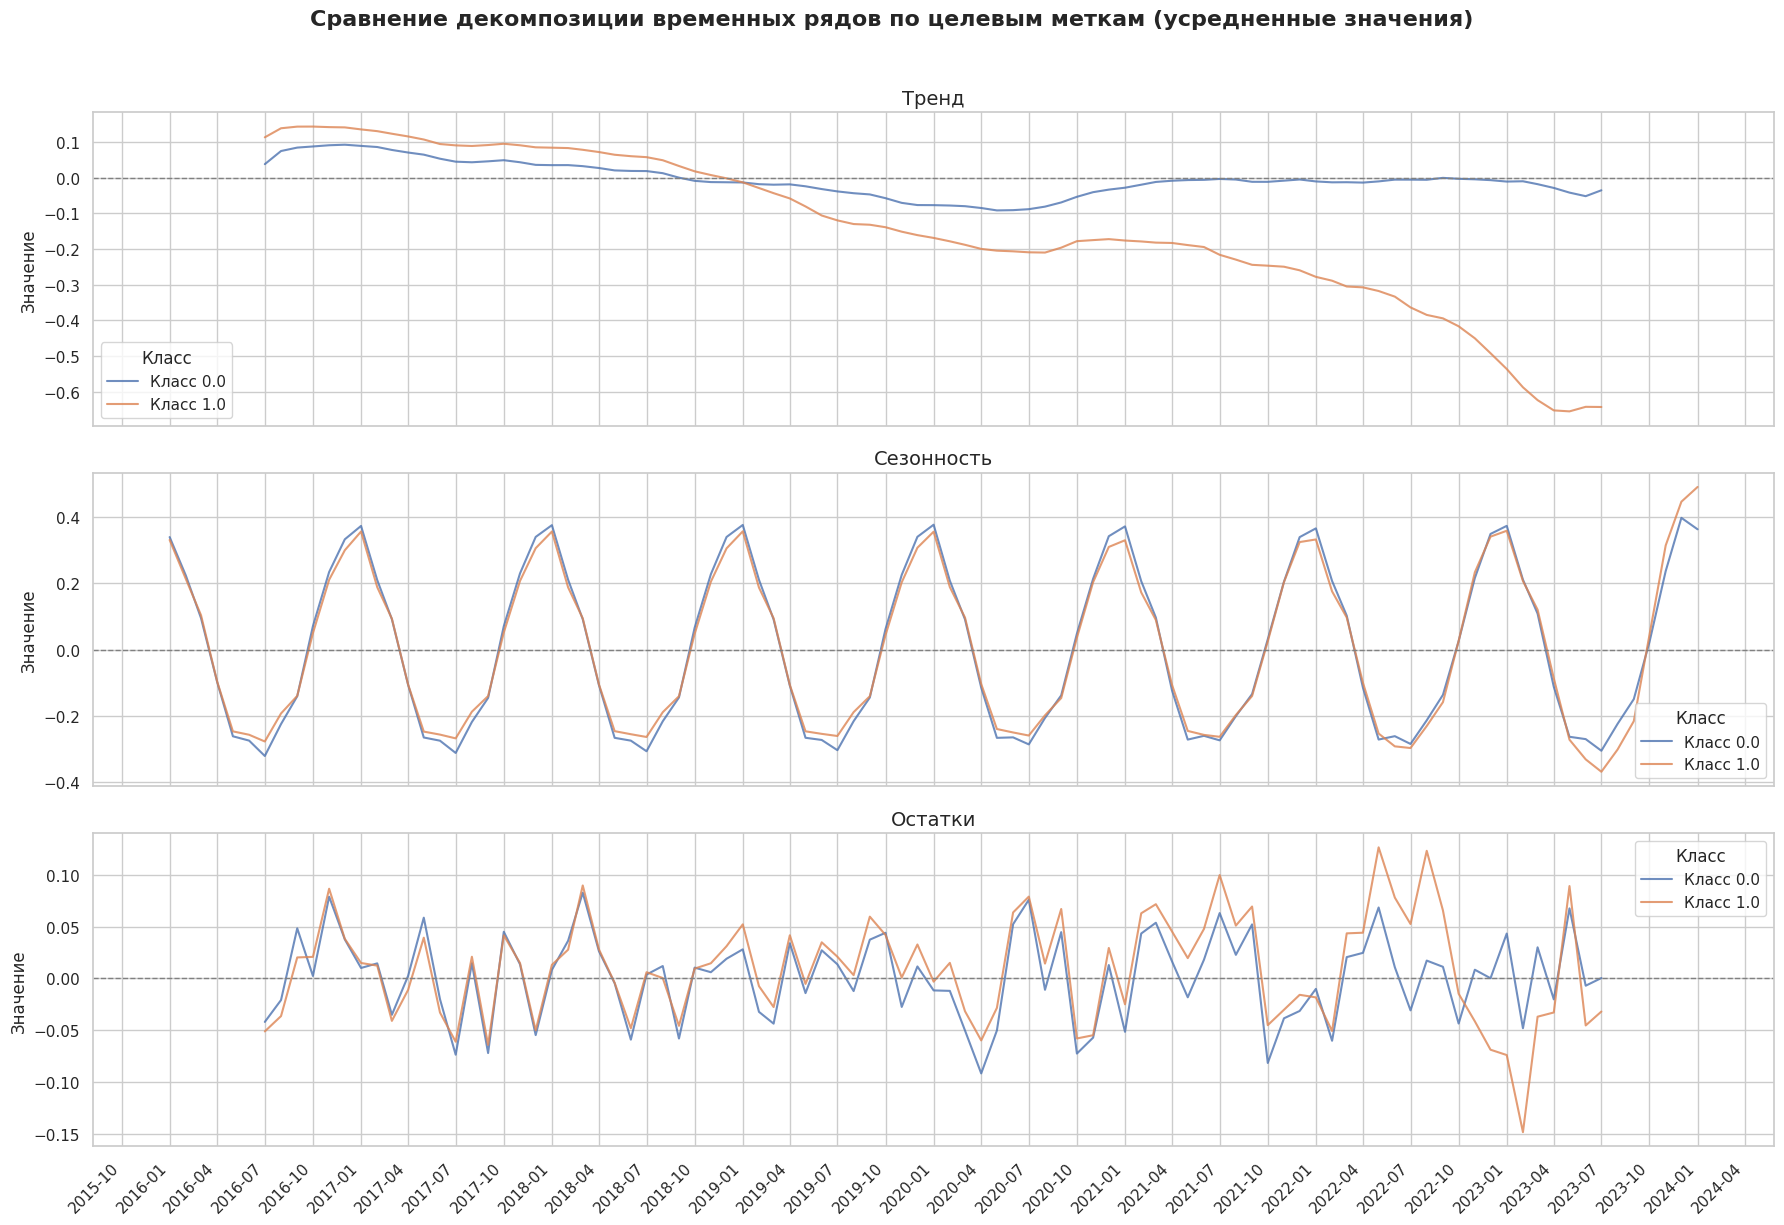

In [33]:
# График сравнения декомпозиции временных рядов по целевым меткам (усредненные значения)

# Преобразуем даты и значения в корректный формат
df['dates'] = df['dates'].apply(pd.to_datetime)
df['values'] = df['values'].apply(pd.to_numeric, errors='coerce')

# Отбираем все ряды для каждой метки класса
grouped = df.groupby('label')

# Создаем словари для хранения усредненных значений
avg_trend = {}
avg_seasonal = {}
avg_resid = {}

# Выполняем декомпозицию для каждого ряда каждой метки и усредняем результаты
for label, group in grouped:
    trends = []
    seasonals = []
    resids = []

    for _, row in group.iterrows():
        series = pd.Series(row['values'], index=row['dates'])
        series = series.dropna()

        if len(series) > 2:
            try:
                result = seasonal_decompose(series, model='additive', period=12)
                trends.append(result.trend)
                seasonals.append(result.seasonal)
                resids.append(result.resid)
            except ValueError as e:
                print(f"Ошибка для класса {label}: {e}")

    # Усредняем компоненты
    avg_trend[label] = pd.concat(trends, axis=1).mean(axis=1)
    avg_seasonal[label] = pd.concat(seasonals, axis=1).mean(axis=1)
    avg_resid[label] = pd.concat(resids, axis=1).mean(axis=1)

# Построение графиков
fig, axes = plt.subplots(3, 1, figsize=(18, 12), sharex=True)

for label in avg_trend.keys():
    axes[0].plot(avg_trend[label], label=f'Класс {label}', linewidth=1.5, alpha=0.8)
    axes[1].plot(avg_seasonal[label], label=f'Класс {label}', linewidth=1.5, alpha=0.8)
    axes[2].plot(avg_resid[label], label=f'Класс {label}', linewidth=1.5, alpha=0.8)

# Настройки отображения
axes[0].set_title("Тренд", fontsize=14)
axes[1].set_title("Сезонность", fontsize=14)
axes[2].set_title("Остатки", fontsize=14)

for ax in axes:
    ax.legend(title="Класс")
    ax.set_ylabel("Значение")
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.suptitle("Сравнение декомпозиции временных рядов по целевым меткам (усредненные значения)", fontsize=16, fontweight='bold', y=1.02)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Можно заметить, что тренд визуально различим, чего нельзя сказать про сезонность. Остатки значимо различны ближе к концу временной шкалы.